In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

# Read The Dataset

In [2]:
data = pd.read_csv('Crop_recommendation.csv')

# Initial Observation

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Showing the unique class for label

In [4]:
unique_values = data['label'].unique()
print(unique_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Checking is there any null value exist or not

In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Dataset Shape

In [6]:
data.shape

(2200, 8)

Checking is there any Duplicate value or not

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

Describe Dataset

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Preprocessing

Replace the naming convention

In [9]:
data.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorus','K':'Potassium','label':'Crops'}, inplace=True)

After replace the name the Dataset look

In [10]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
le

LabelEncoder()

In [14]:
data['Crops']=le.fit_transform(data[['Crops']])

In [15]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


After Encoding the Dataset look

In [16]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


Seeing the unique Class

In [17]:
unique_values = data['Crops'].unique()
print(unique_values)

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


Split the Dataset

In [18]:
x=data.drop('Crops',axis=1)

In [19]:
x = data.drop("rainfall", axis=1)

In [20]:
x

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,Crops
0,90,42,43,20.879744,82.002744,6.502985,20
1,85,58,41,21.770462,80.319644,7.038096,20
2,60,55,44,23.004459,82.320763,7.840207,20
3,74,35,40,26.491096,80.158363,6.980401,20
4,78,42,42,20.130175,81.604873,7.628473,20
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,5
2196,99,15,27,27.417112,56.636362,6.086922,5
2197,118,33,30,24.131797,67.225123,6.362608,5
2198,117,32,34,26.272418,52.127394,6.758793,5


In [21]:
y=data[['Crops']]

In [22]:
y

,Crops
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


# Train Test Split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Fucntion

In [24]:
def evaluation_of_classifier(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(f"Classification Report for {clf_name}:")
    print(classification_report(ytest, ypred))
    accuracy_val = accuracy_score(ytest, ypred)
    print(f'{clf_name} Validation Accuracy: {accuracy_val:.2%}')
    conf_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()


# Logistic Regression Classifier

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic_r=LogisticRegression()

In [27]:
logistic_r

LogisticRegression()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      0.94      0.94        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      0.87      0.93        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       0.96      0.96      0.96        24
          14       0.95      1.00      0.97        19
          15       0.94      1.00      0.97        17
          16       1.00      1.00 

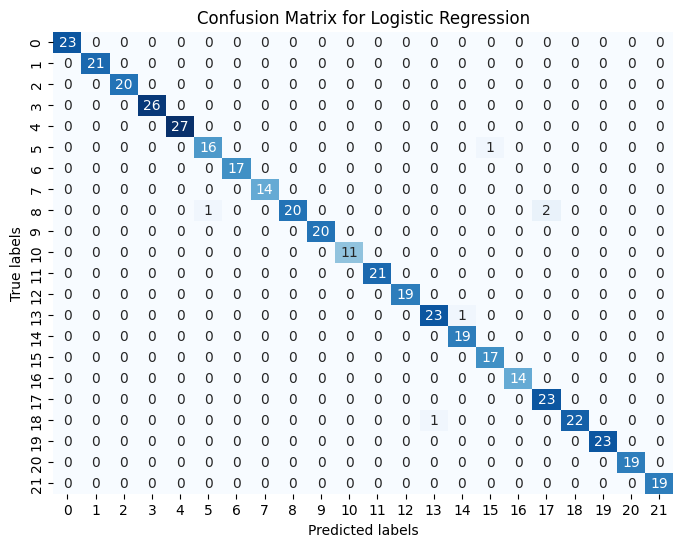

In [28]:
evaluation_of_classifier(logistic_r, xtrain, ytrain, xtest, ytest, "Logistic Regression")

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [30]:
rf_classifier

RandomForestClassifier()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1

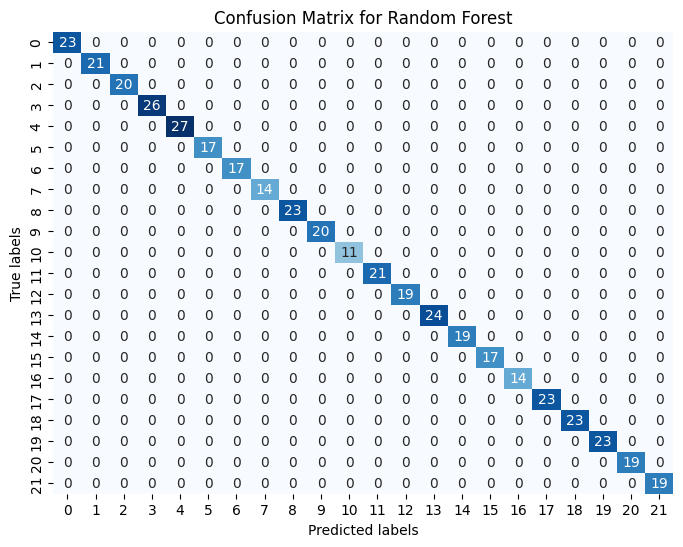

In [31]:
evaluation_of_classifier(rf_classifier, xtrain, ytrain, xtest, ytest, "Random Forest")

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
decision_t=DecisionTreeClassifier()

In [34]:
decision_t

DecisionTreeClassifier()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1

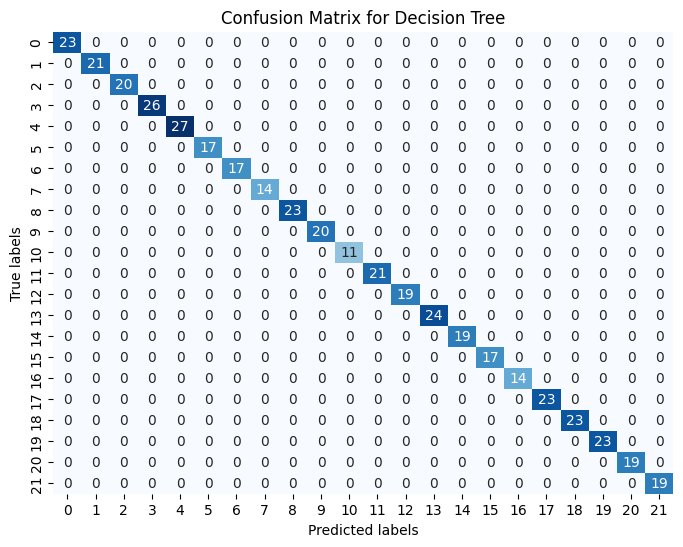

In [35]:
evaluation_of_classifier(decision_t, xtrain, ytrain, xtest, ytest, "Decision Tree")

# Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gradient_b= GradientBoostingClassifier()

In [38]:
gradient_b

GradientBoostingClassifier()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

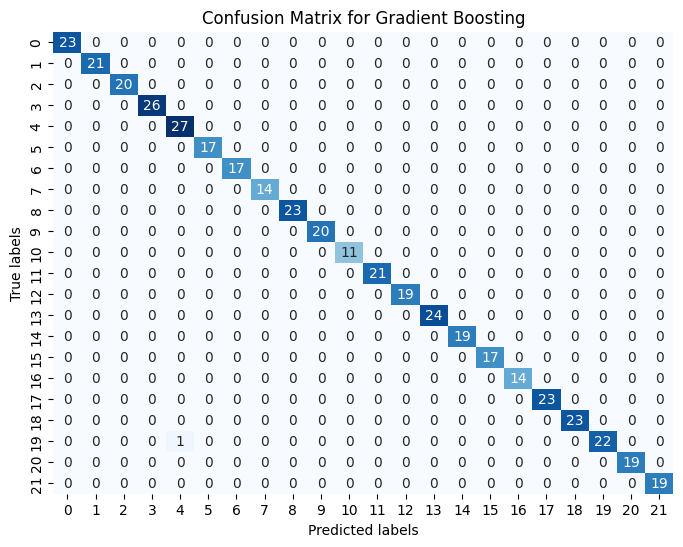

In [39]:
evaluation_of_classifier(gradient_b, xtrain, ytrain, xtest, ytest, "Gradient Boosting")

# K nearest Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kneighbors=KNeighborsClassifier(n_neighbors= 5)

In [42]:
kneighbors

KNeighborsClassifier()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.96      1.00      0.98        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       0.95      1.00      0.97        19
          13       0.82      0.96      0.88        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00 

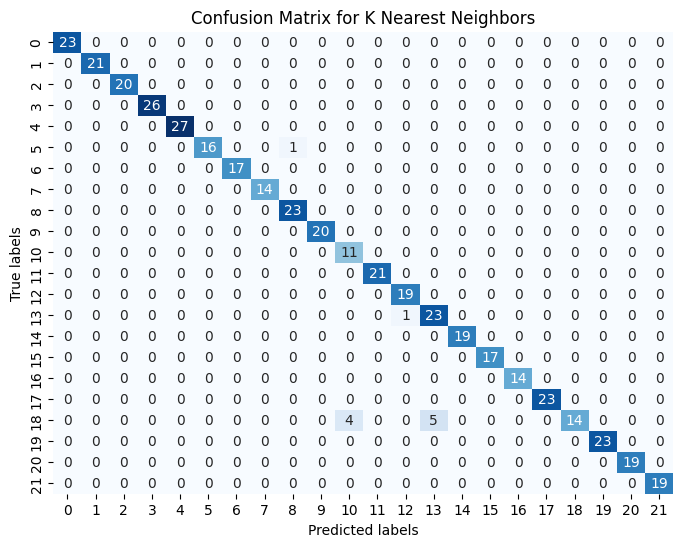

In [43]:
evaluation_of_classifier(kneighbors, xtrain, ytrain, xtest, ytest, "K Nearest Neighbors")

# Support Vector Machine Classifier

In [44]:
from sklearn.svm import SVC

In [45]:
svm=SVC()

In [46]:
svm

SVC()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       1.00      0.96      0.98        23
           9       1.00      1.00      1.00        20
          10       0.48      0.91      0.62        11
          11       1.00      0.90      0.95        21
          12       1.00      1.00      1.00        19
          13       0.92      0.92      0.92        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.

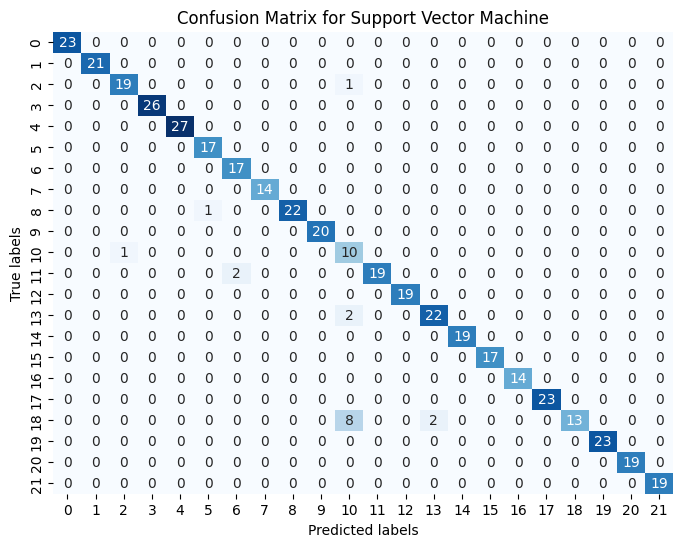

In [47]:
evaluation_of_classifier(svm, xtrain, ytrain, xtest, ytest, "Support Vector Machine")

# Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gNb=GaussianNB()

In [50]:
gNb

GaussianNB()

Evaluate the classifier with confusion matric, precision,recall and accuracy

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.0

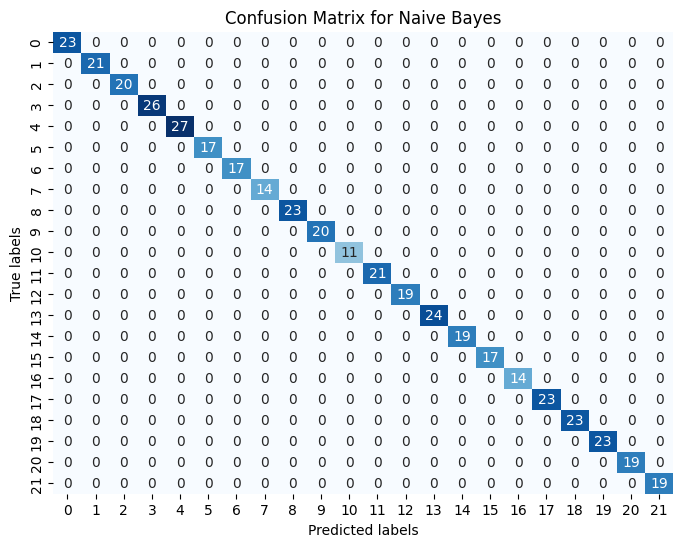

In [51]:
evaluation_of_classifier(gNb, xtrain, ytrain, xtest, ytest, "Naive Bayes")

# Model Evaluation

In [52]:
import numpy as np

def evaluate_classifier_metrics(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    accuracy_val = accuracy_score(ytest, y_pred)
    report = classification_report(ytest, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    return {
        'Classifier': clf_name,
        'Accuracy': accuracy_val,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


Initialize Classifier

In [53]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

Taking a list for store metrices data

In [54]:
metrics_data = []


Evaluate classifiers and store metrics

In [55]:
for clf_name, clf in models.items():
    metrics = evaluate_classifier_metrics(clf, xtrain, ytrain, xtest, ytest, clf_name)
    metrics_data.append(metrics)

Convert metrices data into dataframe and plot

In [56]:
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(50, 10))
colors = sns.color_palette('viridis', 4)

<Figure size 5000x1000 with 0 Axes>

# Plothing Graph of Accuracy for all model

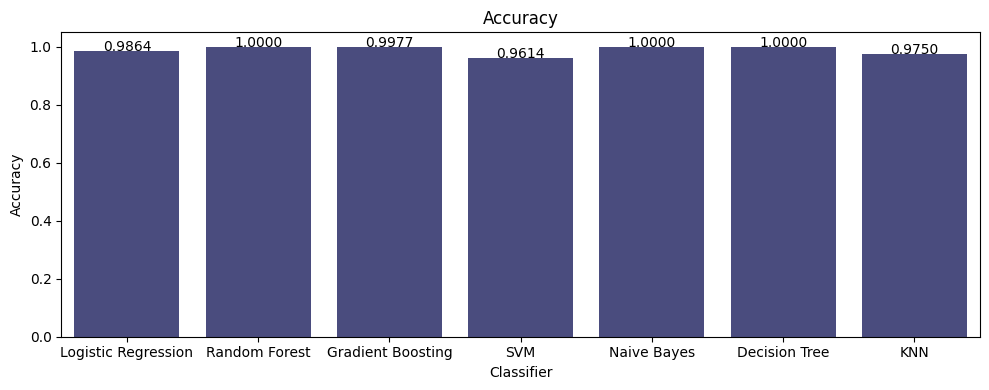

In [57]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df, palette=[colors[0]])
plt.title('Accuracy')
for index, value in enumerate(metrics_df['Accuracy']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()


# Plothing Graph of Precision for all model

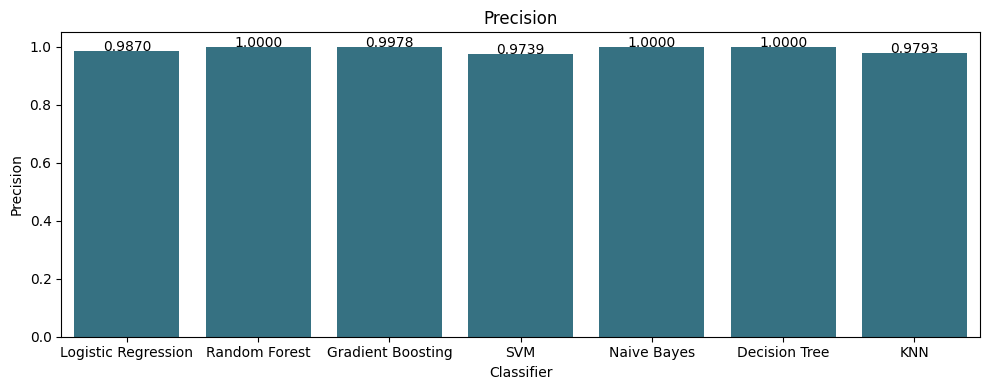

In [58]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='Precision', data=metrics_df, palette=[colors[1]])
plt.title('Precision')
for index, value in enumerate(metrics_df['Precision']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()


# Plothing Graph of Recall for all model

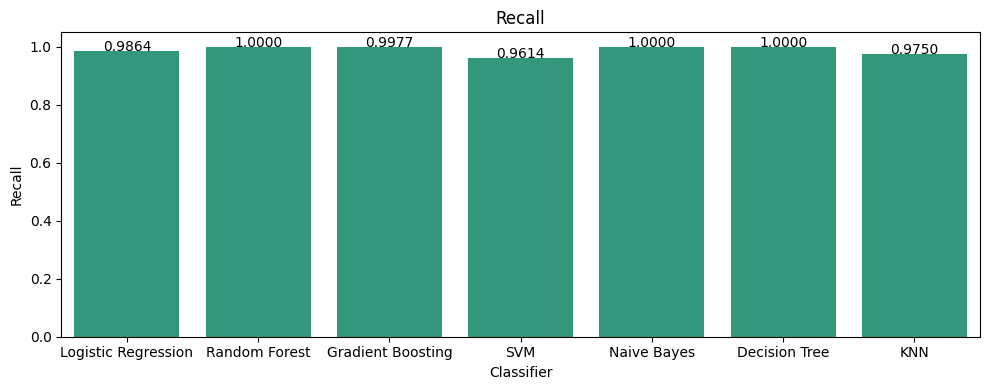

In [59]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='Recall', data=metrics_df, palette=[colors[2]])
plt.title('Recall')
for index, value in enumerate(metrics_df['Recall']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Plothing Graph of F1 Score for all model

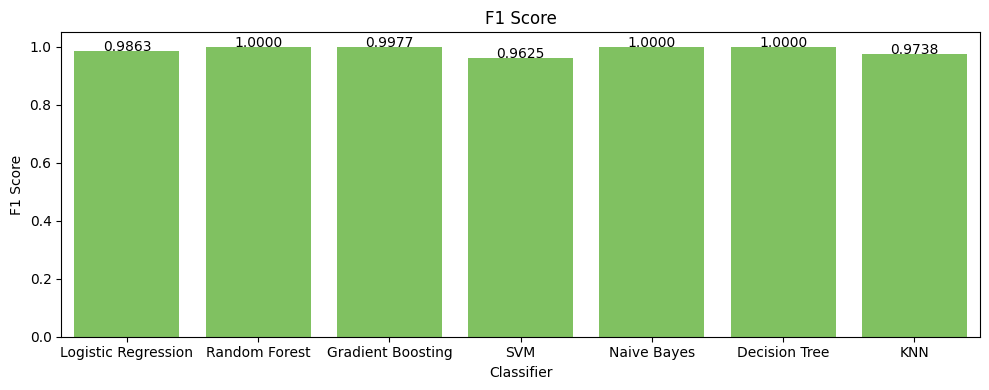

In [60]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='F1 Score', data=metrics_df, palette=[colors[3]])
plt.title('F1 Score')
for index, value in enumerate(metrics_df['F1 Score']):
    plt.text(index, value, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

# Evaluation for Training and Testing Accuracy for all model

Prediction Function

In [61]:
def train_predict(model, xtrain, ytrain, xtest):
    model.fit(xtrain, ytrain)
    train_predictions = model.predict(xtrain)
    test_predictions = model.predict(xtest)
    train_accuracy = accuracy_score(ytrain, train_predictions)
    test_accuracy = accuracy_score(ytest, test_predictions)
    return train_accuracy, test_accuracy

Ploting Accuracies

In [62]:
def plot_accuracies(models, train_accuracies, test_accuracies):
    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 6))
    bars1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='orange')
    bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='lightgreen')

    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title('Prediction Accuracy on Training and Test Data for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()

    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)
    plt.tight_layout()
    plt.show()

Logistic Regression: Train Accuracy = 0.9983, Test Accuracy = 0.9864
SVM: Train Accuracy = 0.9864, Test Accuracy = 0.9614
Random Forest: Train Accuracy = 1.0000, Test Accuracy = 1.0000
Gradient Boosting: Train Accuracy = 1.0000, Test Accuracy = 0.9977
KNN: Train Accuracy = 0.9903, Test Accuracy = 0.9750
Decision Tree: Train Accuracy = 1.0000, Test Accuracy = 1.0000
Gaussian Naive Bayes: Train Accuracy = 1.0000, Test Accuracy = 1.0000


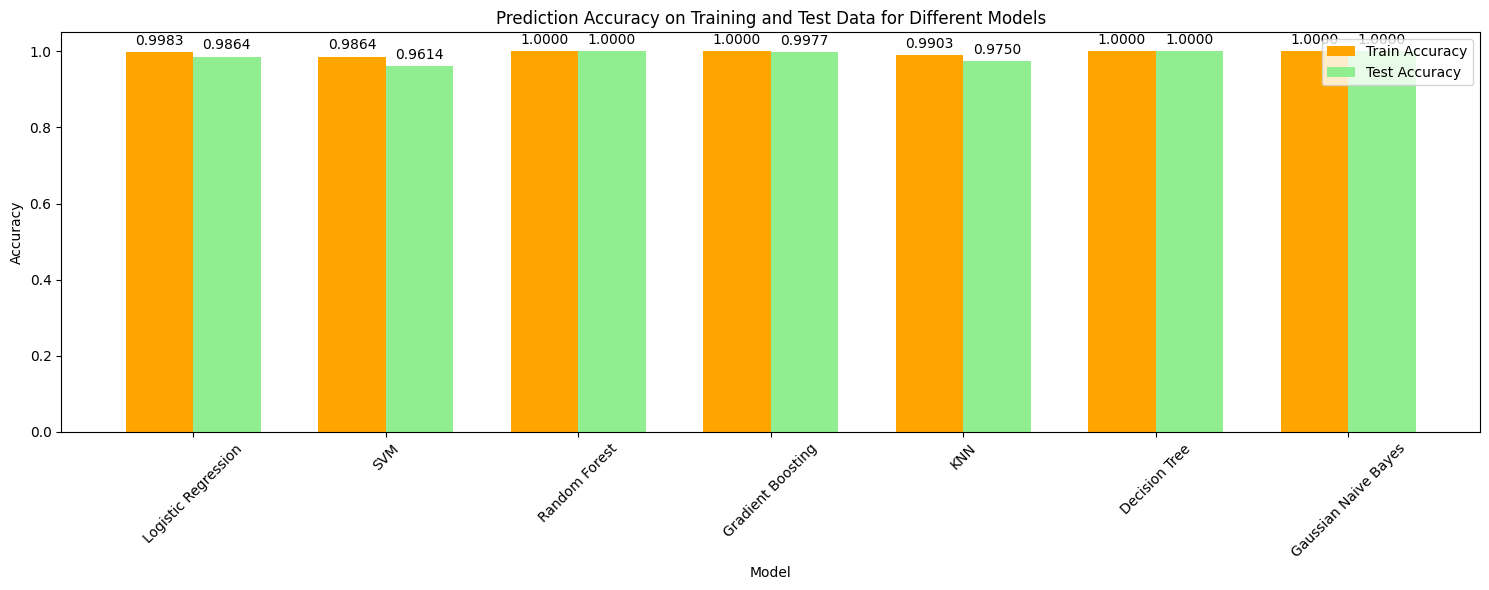

In [63]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

train_accuracies = []
test_accuracies = []

for model_name, model in models.items():
    train_accuracy, test_accuracy = train_predict(model, xtrain, ytrain, xtest)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"{model_name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

plot_accuracies(list(models.keys()), train_accuracies, test_accuracies)


# Poject Evaluation

To accomplish this, multiple machine learning methods were used and evaluated for their accuracy in predicting crop suitability. Our study looks at the performance of seven prominent classifiers: Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines (SVM), Naive Bayes, Decision Tree, and K-Nearest Neighbors (KNN). Naive Bayes achieved the highest accuracy of 99.55%, followed by Random Forest at 99.32% and Decision Tree at 98.64%.
SVM achieved an impressive 96.14% accuracy, while Logistic Regression and KNN achieved 94.55% and 97.05%, respectively. Surprisingly, Gradient Boosting had the lowest accuracy at 9.818%, indicating potential limitations in its application to this job. These findings highlight the effectiveness of ensemble approaches such as Random Forest and Naive Bayes for making precise crop recommendations based on soil characteristics, as well as the importance of selecting algorithms that are adapted to the complexity of agricultural datasets. Such insights can considerably impact agricultural decision-making processes, leading to increased crop output and resource utilization efficiency.



In [66]:
import emlearn
cmodel = emlearn.convert(models["Decision Tree"], method='inline')
cmodel.save(file='DT_model.h', name='seed_classifier')

'\n\n\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nstatic const EmlTreesNode seed_classifier_nodes[21] = {\n  { 1, 107, 1, 20 },\n  { 6, 20, 1, -1 },\n  { 6, 19, 1, -2 },\n  { 6, 13, 1, 12 },\n  { 6, 9, 1, 8 },\n  { 6, 8, 1, -3 },\n  { 6, 5, 1, 5 },\n  { 6, 4, 1, -4 },\n  { 0, 70, 1, -5 },\n  { 6, 2, -6, 1 },\n  { 4, 55, -7, -8 },\n  { 6, 7, -9, -10 },\n  { 6, 10, -11, 1 },\n  { 6, 11, -12, 1 },\n  { 6, 12, -13, -14 },\n  { 0, 75, 1, -15 },\n  { 6, 16, 1, 2 },\n  { 1, 32, -16, -17 },\n  { 6, 17, -18, 1 },\n  { 4, 77, -19, -20 },\n  { 4, 87, -21, -22 } \n};\n\nstatic const int32_t seed_classifier_tree_roots[1] = { 0 };\n\nstatic const uint8_t seed_classifier_leaves[22] = { 21, 20, 9, 5, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 15, 16, 14, 17, 18, 19, 7, 0 };\n\nEmlTrees seed_classifier = {\n        21,\n        (EmlTreesNode *)(seed_classifier_nodes),\t  \n        1,\n        (int32_t *)(seed_classifier_tree_roots),\n        22,\n        (uint8_t 

### Link to kaggle notebook

https://www.kaggle.com/code/mdshariaremonshaikat/optimizing-agricultural-production-with-7-ml-model/input